Paso 1: Importación de Librerías y Carga de Datos

In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import os
#warnings.filterwarnings("ignore")

In [3]:
parent_dir = os.path.dirname(os.getcwd())
data = pd.read_excel (parent_dir + '/data/raw/Liberty_RedLogistics/UnifiedData.xlsx', sheet_name='UnifiedData')
data.head()

,DUA,Item del DUA,Fecha DUA,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,Modelo,...,Total Ley 6946 US$,% DAI,Total DAI US$,COSTO por PROCOMER US$,% S.C,Total SC US$,Otros impuestos US$,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
0,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.43,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409
1,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.61,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314
2,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.76,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490
3,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,3.58,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018
4,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.64,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499


### Paso 2: Conversión de Tipos de Datos
Convertimos la columna `Fecha DUA` a formato datetime para poder realizar el análisis temporal.


In [4]:
# Convertir la columna 'Fecha DUA' a tipo datetime
data['Fecha DUA'] = pd.to_datetime(data['Fecha DUA'], format='%d/%m/%y')

# Verificar la conversión
data.dtypes['Fecha DUA']


dtype('<M8[ns]')

In [5]:
data.head()

,DUA,Item del DUA,Fecha DUA,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,Modelo,...,Total Ley 6946 US$,% DAI,Total DAI US$,COSTO por PROCOMER US$,% S.C,Total SC US$,Otros impuestos US$,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
0,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.43,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409
1,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.61,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314
2,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.76,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490
3,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,3.58,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018
4,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.64,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499


In [6]:
print(data.columns)

Index(['DUA', 'Item del DUA', 'Fecha DUA', 'Aduana', 'Regimen', 'Modalidad',
       'Importador', 'Proveedor', 'Marca', 'Modelo', 'Factura', 'Código SAC',
       'CodSA', 'DescripcionPartida', 'Modo transporte', 'País de Origen',
       'Pais de Procedencia', 'Pais de Adquisición', 'Cantidad',
       'Unidad de Medida', 'Volúmen Físico', 'Cantidad de bultos',
       'Valor FOB US$', 'Valor FOB US$ por unidad', 'Costo flete US$',
       'Costo seguro US$', 'Valor CIF US$', 'Valor CIF US$  unitario',
       'Valor en Aduana US$', 'Peso neto Kg.', 'Peso bruto Kg.',
       'Peso bruto en Lbs.', 'Descripción de Mercancía', 'ID Declarante',
       'Declarante', 'ID Agente Aduanero', 'Agente aduanero',
       'ID Localización', 'Localización', '% IVA', 'Total IVA US$',
       '% Ley 6946', 'Total Ley 6946 US$', '% DAI', 'Total DAI US$',
       'COSTO por PROCOMER US$', '% S.C', 'Total SC US$',
       'Otros impuestos US$', 'Total de Impuestos',
       'Proporción Pr FOB / impuestos', 'Proporc

### Paso 3: Análisis Temporal
En este paso, agrupamos los datos por fecha y sumamos el valor FOB US$ para cada día. Esto nos permitirá analizar la temporalidad de las importaciones a lo largo del tiempo.


In [7]:
# Agrupar los datos por fecha y sumar el valor FOB US$
df_grouped = data.groupby('Fecha DUA')['Valor CIF US$'].sum().reset_index()

# Ver los datos agrupados
print(df_grouped.head())


   Fecha DUA  Valor CIF US$
0 2022-01-03        6779.76
1 2022-01-04        5588.91
2 2022-01-05       13019.30
3 2022-01-06        4598.36
4 2022-01-07       13189.34


### Paso 4: Visualización de la Serie Temporal
En este paso, visualizaremos la serie temporal para observar los patrones, tendencias y posibles estacionalidades en los datos.


In [10]:
import matplotlib.pyplot as plt

# Agrupar los datos por mes y sumar los valores de interés
data_monthly = df_grouped.resample('M').sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(data_monthly.index, data_monthly['Valor CIF US$'], width=20, color='blue')
plt.title('Valor CIF US$ por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor CIF US$')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'Fecha DUA' a formato de fecha si es necesario
data['Fecha DUA'] = pd.to_datetime(data['Fecha DUA'])

# Eliminar filas con valores nulos en la columna 'Fecha DUA'
data = data.dropna(subset=['Fecha DUA'])

# Agrupar los datos por mes y sumar los valores de interés
data_monthly = data.groupby(data['Fecha DUA'].dt.to_period('M')).sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(data_monthly.index.astype(str), data_monthly['Valor CIF US$'])
plt.title('Valor CIF US$ por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor CIF US$')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()


TypeError: datetime64 type does not support sum operations

### Paso 5: Análisis de Tendencias y Estacionalidad
En este paso, analizaremos la serie temporal para identificar posibles tendencias y estacionalidades.


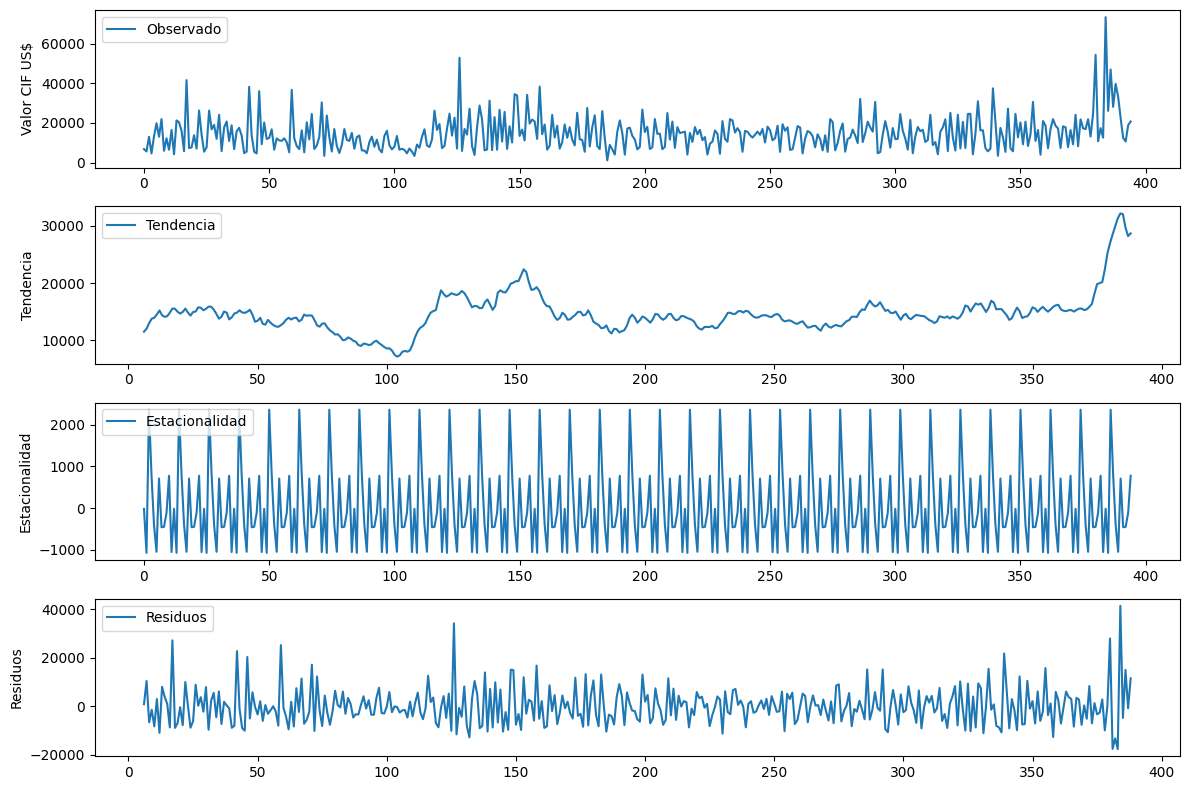

In [ ]:
# Descomposición de la serie temporal para análisis de tendencias y estacionalidades
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
result = seasonal_decompose(df_grouped['Valor CIF US$'], model='additive', period=12)

# Gráficos de tendencia, estacionalidad y residuos
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observado')
plt.legend(loc='upper left')
plt.ylabel('Valor CIF US$')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.ylabel('Tendencia')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.ylabel('Estacionalidad')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuos')
plt.legend(loc='upper left')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()


### Paso 6: Modelado con SARIMAX
En este paso, utilizaremos el modelo SARIMAX para predecir futuros valores de la serie temporal del Valor CIF US$.


In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta

# Crear el modelo SARIMAX
model = SARIMAX(df_grouped['Valor CIF US$'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Ajustar el modelo a los datos
result = model.fit()

# Hacer predicciones para los próximos 6 meses
forecast = result.get_forecast(steps=6)

# Obtener las fechas para las predicciones
forecast_dates = pd.date_range(start=df_grouped['Fecha DUA'].iloc[-1], periods=7, freq='D')[1:]

# Visualizar las predicciones
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Fecha DUA'], df_grouped['Valor CIF US$'], label='Observado')
plt.plot(forecast_dates, forecast.predicted_mean, label='Predicción', linestyle='--', color='red')
plt.title('Predicción del Valor CIF US$ utilizando SARIMAX')
plt.xlabel('Fecha')
plt.ylabel('Valor CIF US$')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'df_grouped' is not defined

### Paso 7: Evaluación del Modelo SARIMAX
En este paso, evaluaremos el rendimiento del modelo SARIMAX utilizando métricas de evaluación específicas para series temporales.


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Obtener los datos reales para el período de predicción
actual_values = df_grouped['Valor CIF US$'][-6:]

# Calcular las predicciones del modelo
predicted_values = forecast.predicted_mean

# Calcular métricas de evaluación
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)

print("Error Medio Absoluto (MAE):", mae)
print("Error Cuadrático Medio (MSE):", mse)
print("Raíz del Error Cuadrático Medio (RMSE):", rmse)


Error Medio Absoluto (MAE): 9949.586370199007
Error Cuadrático Medio (MSE): 113812954.96346581
Raíz del Error Cuadrático Medio (RMSE): 10668.315469813677
